## Task 2 🧑🏽‍💻

Make a Deep Learning Image classification model on **Spoke and Alloy Wheel Dataset**(50 Points) 📷

* Gather the Data (10 points) 📅
* Create model (20 points) 😶‍🌫️
* Optimise Model (10 points) 🔨
* Evaluate Model on Unknown Data (10 points) 🚀


##Gather Data

Here I have gather data from the various websites like Appolo Tyres, MRF Tyres, Unsplash, Pexels and Images.cv, etc. using fatkun tool (A web Scrapper tool).

Then after the image data is divided into folder structure of train and validation.

Here we will be importing the zip file of the data from the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow_hub as hub

In [ ]:
import zipfile

# Download zip file of Spoke Alloy wheel images
# Googe Drive : !wget 'https://drive.google.com/file/d/1940SZ17a1AwvvLj31HP5oqXVcIfaijr5/view?usp=sharing'

#Unzip the downloaded file

zip_ref=zipfile.ZipFile('/content/drive/MyDrive/Spoke_Alloy_wheel_Dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls Spoke_Alloy_wheel_Dataset

Test  Train


In [ ]:
!ls Spoke_Alloy_wheel_Dataset/Train/

Alloy  Spokes


In [ ]:
!ls Spoke_Alloy_wheel_Dataset/Train/Alloy/

 Alloy_train100.jpg	   Alloy_train217.jpg   Alloy_train333.jpg
 Alloy_train101.jpg	   Alloy_train218.jpg   Alloy_train334.jpg
 Alloy_train102.jpg	   Alloy_train219.jpg   Alloy_train335.jpg
 Alloy_train103.jpg	   Alloy_train21.jpg    Alloy_train336.jpg
 Alloy_train104.jpg	   Alloy_train220.jpg   Alloy_train337.jpg
 Alloy_train105.jpg	   Alloy_train221.jpg   Alloy_train338.jpg
 Alloy_train106.jpg	   Alloy_train222.jpg   Alloy_train339.jpg
 Alloy_train107.jpg	   Alloy_train223.jpg   Alloy_train33.jpg
 Alloy_train108.jpg	   Alloy_train224.jpg   Alloy_train340.jpg
 Alloy_train109.jpg	   Alloy_train225.jpg   Alloy_train341.jpg
 Alloy_train10.jpg	   Alloy_train226.jpg   Alloy_train342.jpg
 Alloy_train110.jpg	   Alloy_train227.jpg   Alloy_train343.jpg
 Alloy_train111.jpg	   Alloy_train228.jpg   Alloy_train344.jpg
 Alloy_train112.jpg	   Alloy_train229.jpg   Alloy_train345.jpg
 Alloy_train113.jpg	   Alloy_train22.jpg    Alloy_train346.jpg
 Alloy_train114.jpg	   Alloy_train230.jpg   Alloy_train34

In [ ]:
!ls Spoke_Alloy_wheel_Dataset/Test/Spokes

Spokes_test100.jpg  Spokes_test139.jpg	Spokes_test27.jpg   Spokes_test65.jpg
Spokes_test101.jpg  Spokes_test13.jpg	Spokes_test28.jpg   Spokes_test66.jpg
Spokes_test102.jpg  Spokes_test140.jpg	Spokes_test29.jpg   Spokes_test67.jpg
Spokes_test103.jpg  Spokes_test141.jpg	Spokes_test2.jpg    Spokes_test68.jpg
Spokes_test104.jpg  Spokes_test142.jpg	Spokes_test30.jpg   Spokes_test69.jpg
Spokes_test105.jpg  Spokes_test143.jpg	Spokes_test31.jpg   Spokes_test6.jpg
Spokes_test106.jpg  Spokes_test144.jpg	Spokes_test32.jpg   Spokes_test70.jpg
Spokes_test107.jpg  Spokes_test145.jpg	Spokes_test33.jpg   Spokes_test71.jpg
Spokes_test108.jpg  Spokes_test146.jpg	Spokes_test34.jpg   Spokes_test72.jpg
Spokes_test109.jpg  Spokes_test147.jpg	Spokes_test35.jpg   Spokes_test73.jpg
Spokes_test10.jpg   Spokes_test148.jpg	Spokes_test36.jpg   Spokes_test74.jpg
Spokes_test110.jpg  Spokes_test149.jpg	Spokes_test37.jpg   Spokes_test75.jpg
Spokes_test111.jpg  Spokes_test14.jpg	Spokes_test38.jpg   Spokes_test76.jpg
Sp

In [ ]:
import os

# Walk through spoke_alloy_dataset directory and list number of files
for dirpath, dirnames, filenames in os.walk("Spoke_Alloy_wheel_Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Spoke_Alloy_wheel_Dataset'.
There are 2 directories and 0 images in 'Spoke_Alloy_wheel_Dataset/Test'.
There are 0 directories and 165 images in 'Spoke_Alloy_wheel_Dataset/Test/Spokes'.
There are 0 directories and 165 images in 'Spoke_Alloy_wheel_Dataset/Test/Alloy'.
There are 2 directories and 0 images in 'Spoke_Alloy_wheel_Dataset/Train'.
There are 0 directories and 385 images in 'Spoke_Alloy_wheel_Dataset/Train/Spokes'.
There are 0 directories and 385 images in 'Spoke_Alloy_wheel_Dataset/Train/Alloy'.


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # target directory (view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

##Resize the Images into (224,224)size

In [ ]:
import os
import cv2

# Define the path to the directory containing the images
directory = "Spoke_Alloy_wheel_Dataset/"

# Define the target size of the images
target_size = (224, 224)

# Loop through all subdirectories within the directory
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(root, filename)
            img = cv2.imread(filepath)
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(filepath, resized_img)


Image shape: (224, 224, 3)


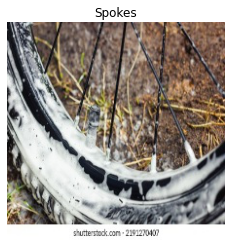

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="Spoke_Alloy_wheel_Dataset/Train/",
                        target_class="Spokes")

In [ ]:
img

array([[[ 16,  16,  24],
        [ 25,  25,  33],
        [ 14,  17,  24],
        ...,
        [126,  84,  68],
        [116,  75,  57],
        [143, 102,  84]],

       [[ 15,  15,  23],
        [ 18,  18,  26],
        [ 20,  23,  30],
        ...,
        [139, 100,  83],
        [130,  92,  73],
        [121,  83,  64]],

       [[ 16,  16,  24],
        [ 18,  18,  26],
        [ 30,  33,  40],
        ...,
        [135,  98,  79],
        [139, 104,  84],
        [130,  95,  75]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

##Set up directories and preprocess the data

In [ ]:
# Set the seed
tf.random.set_seed(42)

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setup the train and test directories
train_dir = "Spoke_Alloy_wheel_Dataset/Train/"
test_dir = "Spoke_Alloy_wheel_Dataset/Test/"

In [ ]:
import os

# Define the path to the train directory
train_dir = "Spoke_Alloy_wheel_Dataset/Train"

# Get the list of subdirectories in the train directory
class_names = os.listdir(train_dir)

# Print the class names
print(class_names)


['Spokes', 'Alloy']


In [ ]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=8, #8 images will be processed at a time
                                               class_mode="binary", 
                                               target_size=(224, 224),
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=8,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 760 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


### Function to ModelCheckpoint Callback

In [ ]:
# Setup checkpoint path
checkpoint_path = "Spokes_Alloy_wheel_Dataset/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, #save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

###Function to tensorboard_callback

In [ ]:
#create tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

###Function to plot loss curves

In [ ]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

##Model 1: Baseline model


###**Convo_Convo_Convo**

In [ ]:
len(train_data),len(test_data)

(95, 42)

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_1 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # 
],name="model_1")

In [ ]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
95/95 [==============================] - 17s 34ms/step - loss: 0.6444 - accuracy: 0.6776 - val_loss: 0.6469 - val_accuracy: 0.6455
Epoch 2/5
95/95 [==============================] - 3s 28ms/step - loss: 0.3501 - accuracy: 0.8711 - val_loss: 0.4540 - val_accuracy: 0.7848
Epoch 3/5
95/95 [==============================] - 3s 28ms/step - loss: 0.1450 - accuracy: 0.9618 - val_loss: 0.7064 - val_accuracy: 0.7970
Epoch 4/5
95/95 [==============================] - 5s 55ms/step - loss: 0.0935 - accuracy: 0.9842 - val_loss: 0.6153 - val_accuracy: 0.7848
Epoch 5/5
95/95 [==============================] - 3s 29ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.6147 - val_accuracy: 0.7758


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
model_1_results = model_1.evaluate(test_data, batch_size=8)
print("test loss, test acc:", model_1_results)

Evaluate on test data
42/42 [==============================] - 1s 33ms/step - loss: 0.6147 - accuracy: 0.7758
test loss, test acc: [0.6146826148033142, 0.7757575511932373]


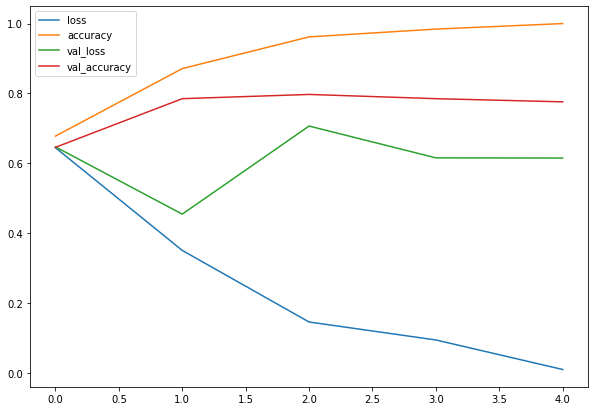

In [ ]:
# Plot the training curves
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

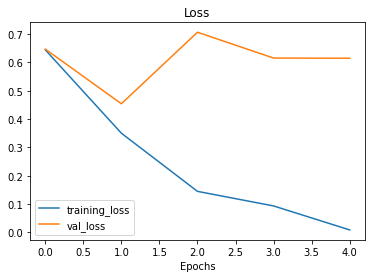

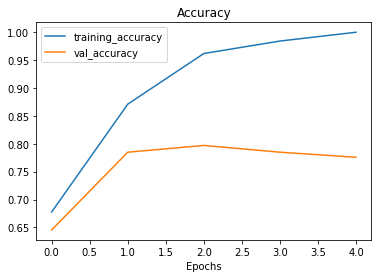

In [ ]:
# loss curves of model_1
plot_loss_curves(history_1)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#MODEL 2: 


##*Convo_Max_Convo_Max_Convo_Max*

In [ ]:
#Create model 
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
95/95 [==============================] - 4s 30ms/step - loss: 0.6535 - accuracy: 0.6079 - val_loss: 0.5717 - val_accuracy: 0.6909
Epoch 2/5
95/95 [==============================] - 4s 42ms/step - loss: 0.5024 - accuracy: 0.7539 - val_loss: 0.4957 - val_accuracy: 0.7515
Epoch 3/5
95/95 [==============================] - 4s 40ms/step - loss: 0.3932 - accuracy: 0.8066 - val_loss: 0.4330 - val_accuracy: 0.7848
Epoch 4/5
95/95 [==============================] - 3s 28ms/step - loss: 0.2941 - accuracy: 0.8842 - val_loss: 0.4242 - val_accuracy: 0.7939
Epoch 5/5
95/95 [==============================] - 3s 29ms/step - loss: 0.2230 - accuracy: 0.9118 - val_loss: 0.4531 - val_accuracy: 0.7818


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
model_2_results = model_2.evaluate(test_data, batch_size=8)
print("test loss, test acc:", model_2_results)

Evaluate on test data
42/42 [==============================] - 1s 19ms/step - loss: 0.4531 - accuracy: 0.7818
test loss, test acc: [0.4530792236328125, 0.7818182110786438]


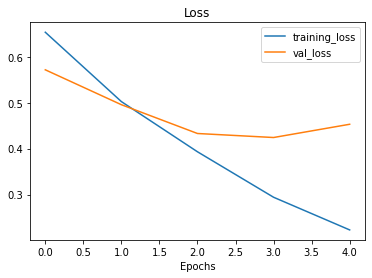

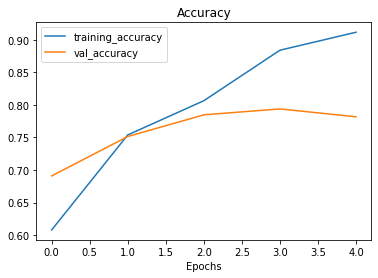

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

#MODEL 3:


##Convo_Convo_Max_Convo_Convo_Max

In [ ]:
#create model
model_3 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
         kernel_size=3,
         activation="relu", 
         input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, 
            padding="valid"), 
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), 
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid") 
],name="model_3")

# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
95/95 [==============================] - 9s 74ms/step - loss: 0.5506 - accuracy: 0.7237 - val_loss: 0.6206 - val_accuracy: 0.6879
Epoch 2/5
95/95 [==============================] - 3s 28ms/step - loss: 0.4407 - accuracy: 0.8118 - val_loss: 0.5442 - val_accuracy: 0.6939
Epoch 3/5
95/95 [==============================] - 3s 28ms/step - loss: 0.3038 - accuracy: 0.8895 - val_loss: 0.3872 - val_accuracy: 0.7939
Epoch 4/5
95/95 [==============================] - 3s 35ms/step - loss: 0.2385 - accuracy: 0.9145 - val_loss: 0.5624 - val_accuracy: 0.7606
Epoch 5/5
95/95 [==============================] - 3s 29ms/step - loss: 0.2026 - accuracy: 0.9276 - val_loss: 0.3665 - val_accuracy: 0.8242


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
model_3_results = model_3.evaluate(test_data, batch_size=8)
print("test loss, test acc:", model_3_results)

Evaluate on test data
42/42 [==============================] - 1s 18ms/step - loss: 0.3665 - accuracy: 0.8242
test loss, test acc: [0.3665473163127899, 0.8242424130439758]


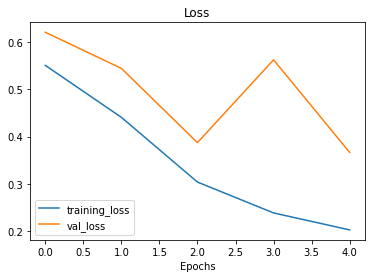

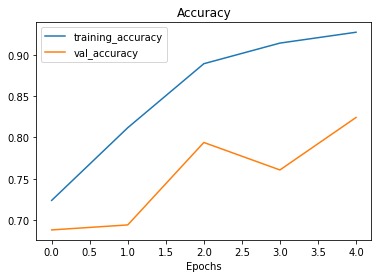

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                       

###Here we don't see any good result of accuracy it's look like it is getting overfitted.
###so let's try Data Augmentation to reduce the overfitting.

#Let's Augment the dataset

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees 
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

#training image without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# test image without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=8,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=8,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=8,
                                             class_mode='binary')

Augmented training images:
Found 760 images belonging to 2 classes.
Non-augmented training images:
Found 760 images belonging to 2 classes.
Unchanged test images:
Found 330 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

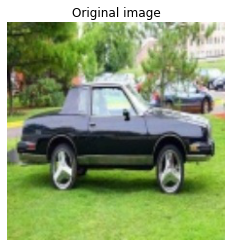

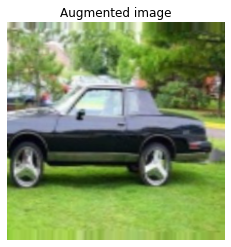

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 8) # we're making batches of size 8, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

##MODEL 4 : Same as Model_2 but after augmentation

In [ ]:
# Create the model (same as model_2)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
95/95 [==============================] - 19s 183ms/step - loss: 0.7308 - accuracy: 0.5184 - val_loss: 0.6809 - val_accuracy: 0.5545
Epoch 2/5
95/95 [==============================] - 11s 115ms/step - loss: 0.6693 - accuracy: 0.5671 - val_loss: 0.6625 - val_accuracy: 0.6242
Epoch 3/5
95/95 [==============================] - 10s 101ms/step - loss: 0.6497 - accuracy: 0.6684 - val_loss: 0.6559 - val_accuracy: 0.7303
Epoch 4/5
95/95 [==============================] - 11s 118ms/step - loss: 0.6547 - accuracy: 0.6434 - val_loss: 0.6430 - val_accuracy: 0.7273
Epoch 5/5
95/95 [==============================] - 11s 118ms/step - loss: 0.6249 - accuracy: 0.6934 - val_loss: 0.6493 - val_accuracy: 0.5515


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
model_4_results = model_4.evaluate(test_data, batch_size=8)
print("test loss, test acc:", model_4_results)

Evaluate on test data
42/42 [==============================] - 1s 17ms/step - loss: 0.6493 - accuracy: 0.5515
test loss, test acc: [0.6493300795555115, 0.5515151619911194]


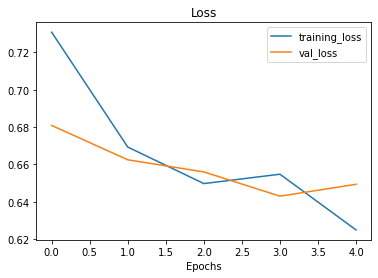

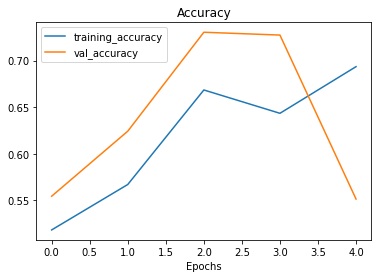

In [ ]:
plot_loss_curves(history_4)

##Now Shuffle the data

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 760 images belonging to 2 classes.


##MODEL 5 : Same as model 2 & 4

In [ ]:
# Create the model (same as model_2 and model_4)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 23s 888ms/step - loss: 0.6960 - accuracy: 0.5553 - val_loss: 0.6560 - val_accuracy: 0.5424
Epoch 2/5
24/24 [==============================] - 12s 493ms/step - loss: 0.5980 - accuracy: 0.7224 - val_loss: 0.6477 - val_accuracy: 0.6515
Epoch 3/5
24/24 [==============================] - 14s 587ms/step - loss: 0.6151 - accuracy: 0.6789 - val_loss: 0.6106 - val_accuracy: 0.6515
Epoch 4/5
24/24 [==============================] - 14s 610ms/step - loss: 0.5481 - accuracy: 0.7368 - val_loss: 0.5505 - val_accuracy: 0.7364
Epoch 5/5
24/24 [==============================] - 12s 508ms/step - loss: 0.5370 - accuracy: 0.7487 - val_loss: 0.5567 - val_accuracy: 0.7273


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
model_5_results = model_5.evaluate(test_data, batch_size=8)
print("test loss, test acc:", model_5_results)

Evaluate on test data
42/42 [==============================] - 1s 27ms/step - loss: 0.5567 - accuracy: 0.7273
test loss, test acc: [0.556652307510376, 0.7272727489471436]


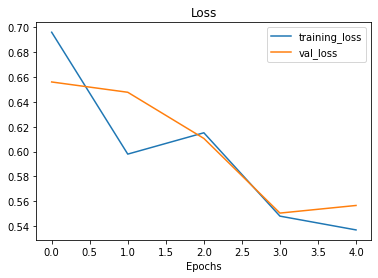

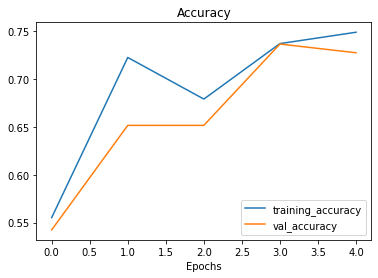

In [ ]:
plot_loss_curves(history_5)

##Here we have got 72.72% accuracy on test dataset.

#Let's try transfer learning 

##we're going to use two models from TensorFlow Hub:

> ResNetV2 


> EfficientNet

> MobileNetV2

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

#mobilenet_v2_100_224 feature_vector
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5" 

In [ ]:
def create_model(model_url):
  
  IMAGE_SHAPE=(224,224,3)
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE) # define the input image shape
  
  # Create our own model
  model = Sequential([
    feature_extractor_layer, # use this layer as the base
    Dense(1, activation='sigmoid', name='output_layer') # create our own output layer      
  ])

  return model

##Transfer LEarning with ResNet50V2 model

In [ ]:
# Create model
resnet_model = create_model(resnet_url)

# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                 
                                  # Add TensorBoard callback to model
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel", # save logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/resnet50V2/20230327-053844
Epoch 1/5
95/95 [==============================] - 11s 55ms/step - loss: 0.4632 - accuracy: 0.7921 - val_loss: 0.2070 - val_accuracy: 0.9333
Epoch 2/5
95/95 [==============================] - 5s 50ms/step - loss: 0.1683 - accuracy: 0.9408 - val_loss: 0.1424 - val_accuracy: 0.9545
Epoch 3/5
95/95 [==============================] - 4s 43ms/step - loss: 0.1158 - accuracy: 0.9711 - val_loss: 0.1215 - val_accuracy: 0.9667
Epoch 4/5
95/95 [==============================] - 4s 43ms/step - loss: 0.0864 - accuracy: 0.9724 - val_loss: 0.1092 - val_accuracy: 0.9485
Epoch 5/5
95/95 [==============================] - 5s 50ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.0983 - val_accuracy: 0.9636


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
resnet_model_results = resnet_model.evaluate(test_data, batch_size=8)
print("test loss, test acc:", resnet_model_results)

Evaluate on test data
42/42 [==============================] - 2s 37ms/step - loss: 0.0983 - accuracy: 0.9636
test loss, test acc: [0.09827016294002533, 0.9636363387107849]


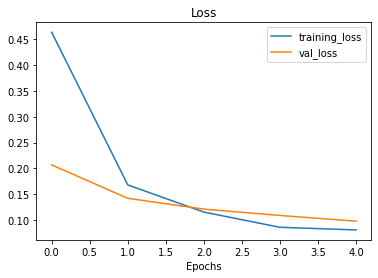

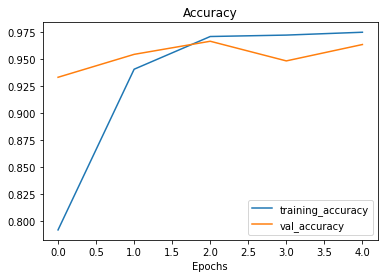

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


### Here by ResNet50V2 model we have recieved accuracy of 96.36% on test dataset. It tremandeous to use transfer learninG.

## Let's try with EfficientNetB0 Model

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url)

# Compile EfficientNet model
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel",                                                                                 
                                                                                     experiment_name="EfficientnetB0")])

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/EfficientnetB0/20230327-053942
Epoch 1/5
95/95 [==============================] - 17s 71ms/step - loss: 0.3703 - accuracy: 0.8658 - val_loss: 0.2272 - val_accuracy: 0.9394
Epoch 2/5
95/95 [==============================] - 3s 34ms/step - loss: 0.1687 - accuracy: 0.9592 - val_loss: 0.1558 - val_accuracy: 0.9455
Epoch 3/5
95/95 [==============================] - 5s 55ms/step - loss: 0.1245 - accuracy: 0.9697 - val_loss: 0.1267 - val_accuracy: 0.9576
Epoch 4/5
95/95 [==============================] - 3s 35ms/step - loss: 0.1022 - accuracy: 0.9789 - val_loss: 0.1112 - val_accuracy: 0.9606
Epoch 5/5
95/95 [==============================] - 3s 35ms/step - loss: 0.0863 - accuracy: 0.9789 - val_loss: 0.1009 - val_accuracy: 0.9667


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
efficientnet_model_results = efficientnet_model.evaluate(test_data, batch_size=8)
print("test loss, test acc:", efficientnet_model_results)

Evaluate on test data
42/42 [==============================] - 1s 23ms/step - loss: 0.1009 - accuracy: 0.9667
test loss, test acc: [0.10091883689165115, 0.9666666388511658]


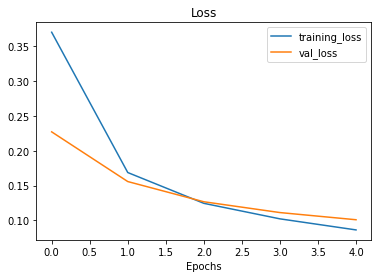

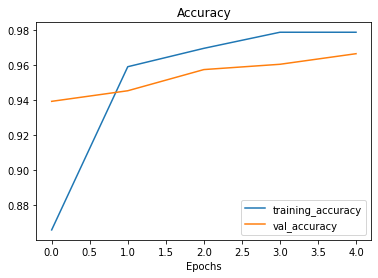

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


###Here we can see the efficientnet model is performing well and it has less no. of parameters than resnet50v2.

##Let's try mobilenet_v2_100_224 model

In [ ]:
# Create model
mobilenet_model = create_model(model_url=mobilenet_url)

# Compile EfficientNet model
mobilenet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit mobilenet model 
mobilenet_history = mobilenet_model.fit(train_data, 
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel",                                                                                 
                                                                                     experiment_name="Mobilenet")])

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/Mobilenet/20230327-054145
Epoch 1/5
95/95 [==============================] - 8s 39ms/step - loss: 0.3181 - accuracy: 0.8737 - val_loss: 0.1844 - val_accuracy: 0.9333
Epoch 2/5
95/95 [==============================] - 4s 37ms/step - loss: 0.1435 - accuracy: 0.9474 - val_loss: 0.1370 - val_accuracy: 0.9576
Epoch 3/5
95/95 [==============================] - 3s 32ms/step - loss: 0.1014 - accuracy: 0.9684 - val_loss: 0.1163 - val_accuracy: 0.9515
Epoch 4/5
95/95 [==============================] - 3s 32ms/step - loss: 0.0878 - accuracy: 0.9711 - val_loss: 0.1028 - val_accuracy: 0.9576
Epoch 5/5
95/95 [==============================] - 3s 32ms/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.1008 - val_accuracy: 0.9606


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
mobilenet_model_results = mobilenet_model.evaluate(test_data, batch_size=8)
print("test loss, test acc:", mobilenet_model_results)

Evaluate on test data
42/42 [==============================] - 2s 36ms/step - loss: 0.1008 - accuracy: 0.9606
test loss, test acc: [0.10075927525758743, 0.960606038570404]


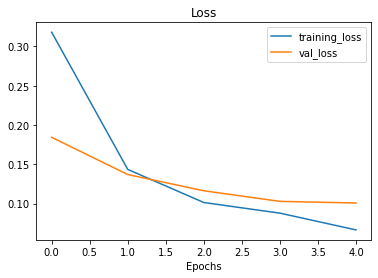

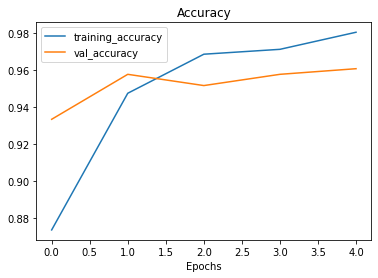

In [ ]:
plot_loss_curves(mobilenet_history)

In [ ]:
mobilenet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


###Here we are getting 96.06% accuracy for test dataset with mobilenet v2 model which is probably similar with efficientnet model  with almost half no. of parameters comparing to efficient net model.

##Let's try to improve accuracy of all three models by using augmented data 

###RESNET MODEL

In [ ]:
# Create model
resnet_model_aug = create_model(resnet_url)

# Compile
resnet_model_aug.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history_aug = resnet_model_aug.fit(train_data_augmented_shuffled,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented_shuffled),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                 
                                  # Add TensorBoard callback to model
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel", # save logs here
                                                                         experiment_name="resnet50V2_augmented")]) # name of log files

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/resnet50V2_augmented/20230327-055247
Epoch 1/5
24/24 [==============================] - 17s 517ms/step - loss: 0.4553 - accuracy: 0.7737 - val_loss: 0.2031 - val_accuracy: 0.9424
Epoch 2/5
24/24 [==============================] - 13s 551ms/step - loss: 0.1821 - accuracy: 0.9395 - val_loss: 0.1364 - val_accuracy: 0.9576
Epoch 3/5
24/24 [==============================] - 12s 495ms/step - loss: 0.1293 - accuracy: 0.9579 - val_loss: 0.1116 - val_accuracy: 0.9606
Epoch 4/5
24/24 [==============================] - 11s 432ms/step - loss: 0.1109 - accuracy: 0.9645 - val_loss: 0.0979 - val_accuracy: 0.9636
Epoch 5/5
24/24 [==============================] - 12s 495ms/step - loss: 0.1028 - accuracy: 0.9671 - val_loss: 0.0874 - val_accuracy: 0.9667


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
resnet_model_aug_results = resnet_model_aug.evaluate(test_data, batch_size=8)
print("test loss, test acc:", resnet_model_aug_results)

Evaluate on test data
42/42 [==============================] - 1s 29ms/step - loss: 0.0874 - accuracy: 0.9667
test loss, test acc: [0.08743531256914139, 0.9666666388511658]


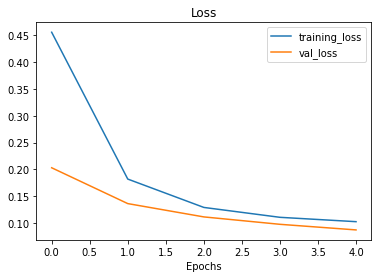

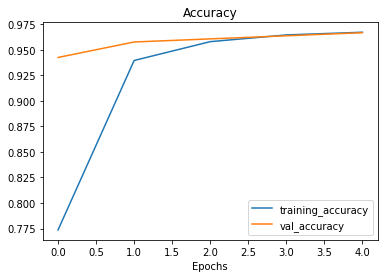

In [ ]:
plot_loss_curves(resnet_history_aug)

In [ ]:
resnet_model_aug.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


###EFFICIENTNET MODEL

In [ ]:
# Create model
efficientnet_model_aug = create_model(model_url=efficientnet_url)

# Compile EfficientNet model
efficientnet_model_aug.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history_aug = efficientnet_model_aug.fit(train_data_augmented_shuffled,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_augmented_shuffled),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel",                                                                                 
                                                                                     experiment_name="EfficientnetB0_augmented")])

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/EfficientnetB0_augmented/20230327-055403
Epoch 1/5
24/24 [==============================] - 24s 527ms/step - loss: 0.4839 - accuracy: 0.8066 - val_loss: 0.3475 - val_accuracy: 0.9212
Epoch 2/5
24/24 [==============================] - 12s 486ms/step - loss: 0.2542 - accuracy: 0.9408 - val_loss: 0.2226 - val_accuracy: 0.9485
Epoch 3/5
24/24 [==============================] - 12s 486ms/step - loss: 0.1827 - accuracy: 0.9526 - val_loss: 0.1735 - val_accuracy: 0.9545
Epoch 4/5
24/24 [==============================] - 12s 487ms/step - loss: 0.1508 - accuracy: 0.9605 - val_loss: 0.1433 - val_accuracy: 0.9636
Epoch 5/5
24/24 [==============================] - 12s 497ms/step - loss: 0.1287 - accuracy: 0.9697 - val_loss: 0.1276 - val_accuracy: 0.9667


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
efficientnet_model_aug_results = efficientnet_model_aug.evaluate(test_data, batch_size=8)
print("test loss, test acc:", efficientnet_model_aug_results)

Evaluate on test data
42/42 [==============================] - 1s 25ms/step - loss: 0.1276 - accuracy: 0.9667
test loss, test acc: [0.12759634852409363, 0.9666666388511658]


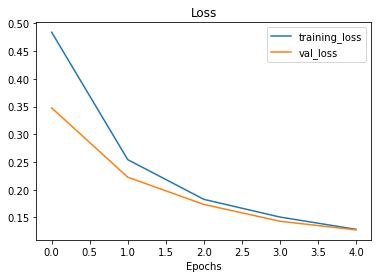

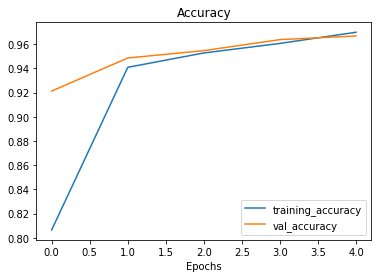

In [ ]:
plot_loss_curves(efficientnet_history_aug)

In [ ]:
efficientnet_model_aug.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


##MOBILENET MODEL

In [ ]:
# Create model
mobilenet_model_aug = create_model(model_url=mobilenet_url)

# Compile EfficientNet model
mobilenet_model_aug.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit mobilenet model 
mobilenet_history_aug = mobilenet_model_aug.fit(train_data_augmented_shuffled, 
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_augmented_shuffled),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tf_hub_Spokes_Alloy_Wheel",                                                                                 
                                                                                     experiment_name="Mobilenet_aug")])

Saving TensorBoard log files to: tf_hub_Spokes_Alloy_Wheel/Mobilenet_aug/20230327-055535
Epoch 1/5
24/24 [==============================] - 16s 491ms/step - loss: 0.3937 - accuracy: 0.8461 - val_loss: 0.2229 - val_accuracy: 0.9424
Epoch 2/5
24/24 [==============================] - 11s 468ms/step - loss: 0.1848 - accuracy: 0.9382 - val_loss: 0.1506 - val_accuracy: 0.9576
Epoch 3/5
24/24 [==============================] - 11s 480ms/step - loss: 0.1352 - accuracy: 0.9579 - val_loss: 0.1262 - val_accuracy: 0.9576
Epoch 4/5
24/24 [==============================] - 11s 481ms/step - loss: 0.1149 - accuracy: 0.9632 - val_loss: 0.1072 - val_accuracy: 0.9697
Epoch 5/5
24/24 [==============================] - 10s 400ms/step - loss: 0.1008 - accuracy: 0.9632 - val_loss: 0.0988 - val_accuracy: 0.9697


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on train data")
mobilenet_model_aug_results_train_accuracy = mobilenet_model_aug.evaluate(train_data, batch_size=8)
print("test loss, test acc:", mobilenet_model_aug_results_train_accuracy)

Evaluate on train data
95/95 [==============================] - 2s 25ms/step - loss: 0.0887 - accuracy: 0.9658
test loss, test acc: [0.08868630975484848, 0.9657894968986511]


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
mobilenet_model_aug_results = mobilenet_model_aug.evaluate(test_data, batch_size=8)
print("test loss, test acc:", mobilenet_model_aug_results)

Evaluate on test data
42/42 [==============================] - 1s 22ms/step - loss: 0.0988 - accuracy: 0.9697
test loss, test acc: [0.0988355204463005, 0.9696969985961914]


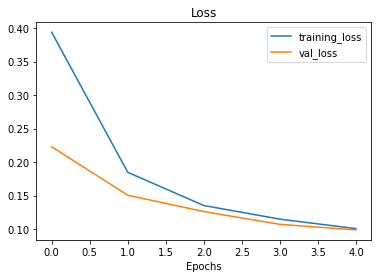

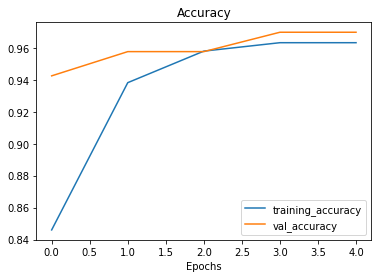

In [ ]:
plot_loss_curves(mobilenet_history_aug)

Here We can See that We have recieved 96.96% accuracy on test dataset using mobilenetv2 model with the less no. of parameter compare to Efficient net and Resnet.

##Let's try Fine tunnig with this models

In [ ]:
# mobilenet_model.trainable = True

# # Freeze all layers except for the
# for layer in mobilenet_model.layers[:-5]:
#   layer.trainable = False

# mobilenet_model.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(0.0001), 
#               metrics=["accuracy"])

In [ ]:
# print(len(mobilenet_model.trainable_variables))

In [ ]:
# # Fit the model saving checkpoints every epoch
# initial_epochs = 5
# mobilenet_finetune_1_history = mobilenet_model.fit(train_data_augmented,
#                                           epochs=initial_epochs+5,
#                                           initial_epoch=mobilenet_history.epoch[-1],
#                                           validation_data=test_data,
#                                           validation_steps=int(len(test_data)),
#                                           callbacks=[create_tensorboard_callback("fine_tunning_Spokes_Alloy_Wheel", "mobilenet_finetune_1"), 
#                                                      checkpoint_callback])

###Here I have comment out the code because finetunning is not working good and model is starting to overfit

#EVALUATE THE MODELS:

### Prepare the image to load into model.


In [ ]:
import cv2

def load_prepare_image(filename, img_size=224):
    # Read in target file (an image)
    img = cv2.imread(filename)

    # Resize the image (to the same size our model was trained on)
    img = cv2.resize(img, (img_size, img_size))

    # Rescale the image (get all values between 0 and 1)
    img = img/255.0

    # Convert the image to a tensor and return it
    img = np.array(img, dtype=np.float32)
    return img


In [ ]:
def predict_class(model, filename, class_names):
    # Load and prepare the image
    img = load_prepare_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]
    
    # Display the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

##MOBILENET MODEL: 

In [ ]:
class_names

['Alloy', 'Spokes']

1/1 [==============================] - 1s 905ms/step


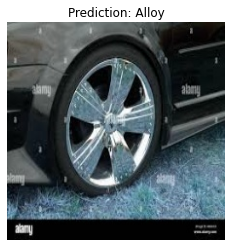

In [ ]:
predict_class(mobilenet_model_aug,'/content/Spoke_Alloy_wheel_Dataset/Test/Alloy/Alloy_test103.jpg',class_names)

1/1 [==============================] - 0s 28ms/step


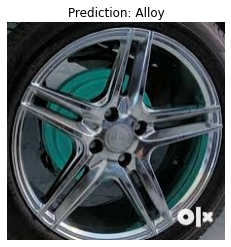

In [ ]:
predict_class(mobilenet_model_aug,'/content/Spoke_Alloy_wheel_Dataset/Test/Alloy/Alloy_test114.jpg',class_names)

1/1 [==============================] - 0s 26ms/step


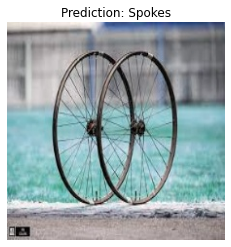

In [ ]:
predict_class(mobilenet_model_aug,'/content/Spoke_Alloy_wheel_Dataset/Test/Spokes/Spokes_test116.jpg',class_names)

1/1 [==============================] - 0s 68ms/step


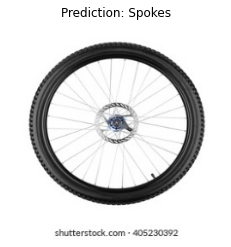

In [ ]:
predict_class(mobilenet_model_aug,'/content/Spoke_Alloy_wheel_Dataset/Test/Spokes/Spokes_test137.jpg',class_names)

##UPLOADING CALLBACKS TO TENSORBOARD

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tf_hub_Spokes_Alloy_Wheel/ \
  --name "ResNet50V2 vs EfficientNetB0 vs MobilenetV2_100_224" \
  --description "Comparing three models for spokes and alloy wheel dataset" \
  --one_shot

2023-03-27 06:11:24.514637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-27 06:11:24.514741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-27 06:11:24.514760: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

New experiment created. View your TensorBoard at: https:

In [ ]:
!tensorboard dev list

2023-03-27 06:11:44.039236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-27 06:11:44.039367: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-27 06:11:44.039406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
https://tensorboard.dev/experiment/jDflj8PDTdulkWIqoPQ12A

##From above we can conclude that we have recieved the best accuracy with the Mobilenet model that is:

> Training Accuracy : 96.57%

> Validation Accuracy : 96.96%